![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab


# Example of Support Vector Machines (SVM)






## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from   sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [ ]:
!wget https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
!unzip -qq F2

!wget https://www.dropbox.com/s/bqfrgjvijpn6rrg/G2.zip
!unzip -qq G2

!wget https://www.dropbox.com/s/eg2wx2ari93n8y7/G3.zip
!unzip -qq G3

!wget https://www.dropbox.com/s/zz51gdrltuoy2fo/G4.zip
!unzip -qq G4

!wget https://www.dropbox.com/s/a0egs8asnwdda4o/P2.zip
!unzip -qq P2

print('Dataset F2, G2, G3, G4 y P2 loaded.')


--2023-07-18 21:13:04--  https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3w6k7vu3xpesjxh/F2.zip [following]
--2023-07-18 21:13:05--  https://www.dropbox.com/s/raw/3w6k7vu3xpesjxh/F2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ae70d015a161ed3519d0b3d96.dl.dropboxusercontent.com/cd/0/inline/CAGOB9ujTQMGJvJ7Eh-WksJPYCs2x1npzDInQO_K2-6SjnGtELrI7iBHmMYLyJ3zyRbKeLn5E-YcWnYKTs8FFJfgBPliqlbW2ptuonPi-KhhpEwTQqVbH09CwesuSFjPHCn7xx__kh2Yd9Bk3LBHrdd2HgsghyeNqry8Y5Q3LvLnbQ/file# [following]
--2023-07-18 21:13:05--  https://uc4ae70d015a161ed3519d0b3d96.dl.dropboxusercontent.com/cd/0/inline/CAGOB9ujTQMGJvJ7Eh-WksJPYCs2x1npzDInQO_K2-6SjnGtELrI7iBHmMYLyJ3zyRbKeLn5E-YcWnYKTs8FFJfgBPliqlbW2p

## Functions


In [ ]:
def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')             # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))   # testing labels
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds)
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds)
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix"), plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d))
    dmax = int(np.max(d))
    #colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    #colors = 'Greens'
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.075
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Reds, alpha=0.8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def plot_decision_heatmap(clf,X,d,st,show=0):
    # based on example of https://scikit-learn.org
    h = 0.075
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    plot_features(X,d,st)
    if show==1:
        plt.show()




def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0)
    accst = f'Acc = {acc:.4f}'
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                             # confusion matrix in training
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(X,d,st+' - Training: '+accst,0)     # feature space in training
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt)
    accst = f'Acc = {acc:.4f}'
    print_confusion(dt,ds)                            # confusion matrix in testing
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,1)    # feature space in testing

# Training/Testing Data

Cargando G2...
Training data: 800 samples with 2 features
 Testing data: 200 samples with 2 features
      Classes: 1...2


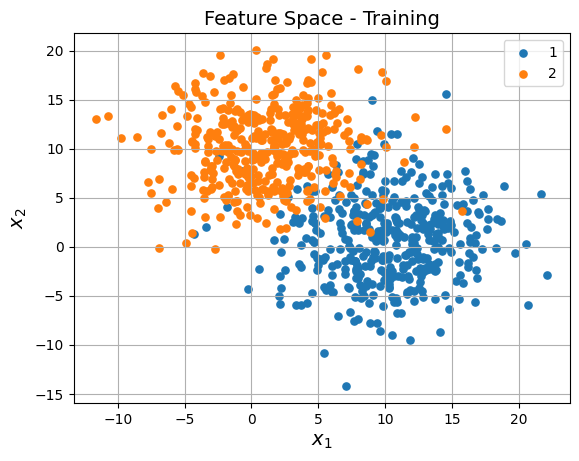

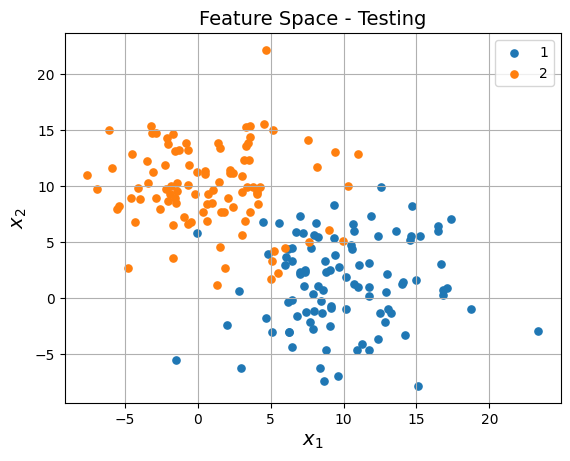

In [ ]:
data = 'G2' # <= it can be 'G2','G3','G4','P2','F2'
print('Cargando '+data+'...')

Xtrain,ytrain,Xtest,ytest   = load_features(data + '/' + data)   # load training and testing data

plot_features(Xtrain,ytrain,'Training')
plot_features(Xtest,ytest,'Testing')


# Parameters

See explanation of parameters `C` and `gamma` [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

# SVM lineal

Training:
Confusion Matrix:
[[373  27]
 [ 16 384]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [10 90]]
Accuracy = 93.00


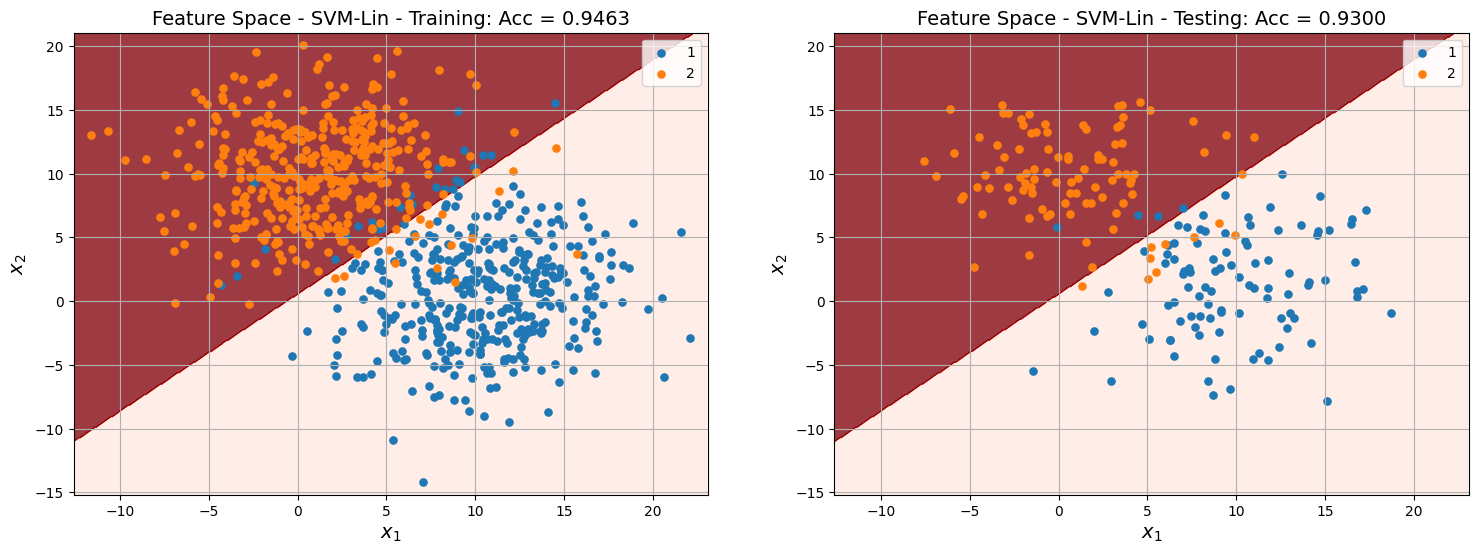

In [ ]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "linear", gamma=0.2, C=0.1)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset
y0  = clf.predict(Xtrain)

# Evaluation on testing subset
ypred  = clf.predict(Xtest)

# Display results
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-Lin',decisionline=1)



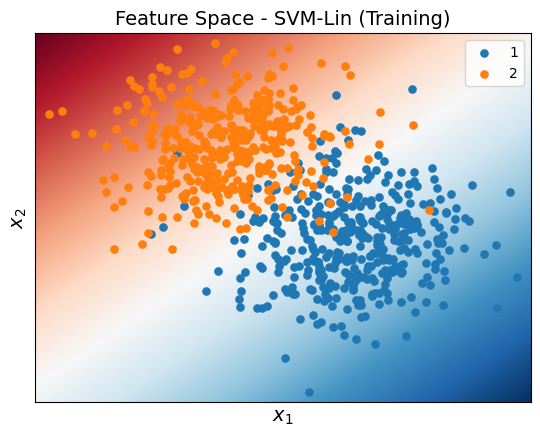

In [ ]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-Lin (Training)')

# SVM Polinomial

Training:
Confusion Matrix:
[[389  11]
 [ 41 359]]
Accuracy = 93.50
Testing:
Confusion Matrix:
[[98  2]
 [11 89]]
Accuracy = 93.50


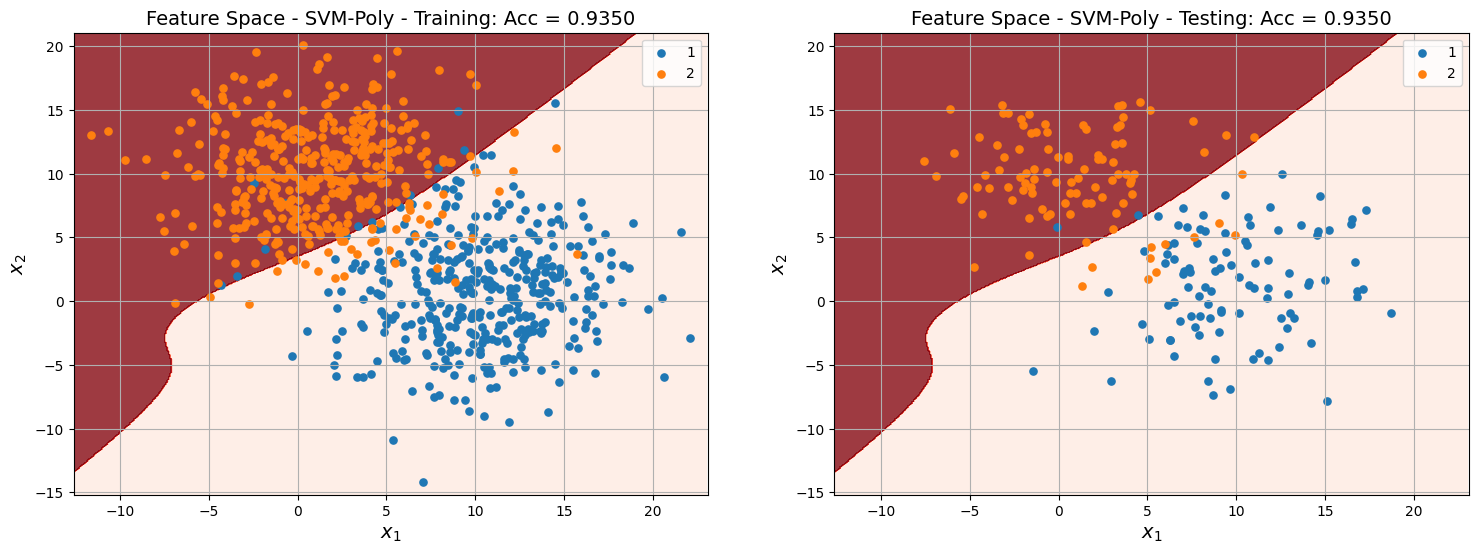

In [ ]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "poly", gamma=0.2, degree = 3, C=0.1)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset
y0  = clf.predict(Xtrain)

# Evaluation on testing subset
ypred  = clf.predict(Xtest)

# Display results
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-Poly',decisionline=1)



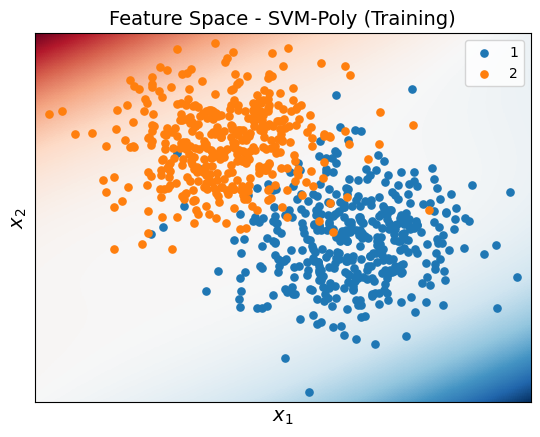

In [ ]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-Poly (Training)')

# SVM RBF

Training:
Confusion Matrix:
[[382  18]
 [ 20 380]]
Accuracy = 95.25
Testing:
Confusion Matrix:
[[96  4]
 [12 88]]
Accuracy = 92.00


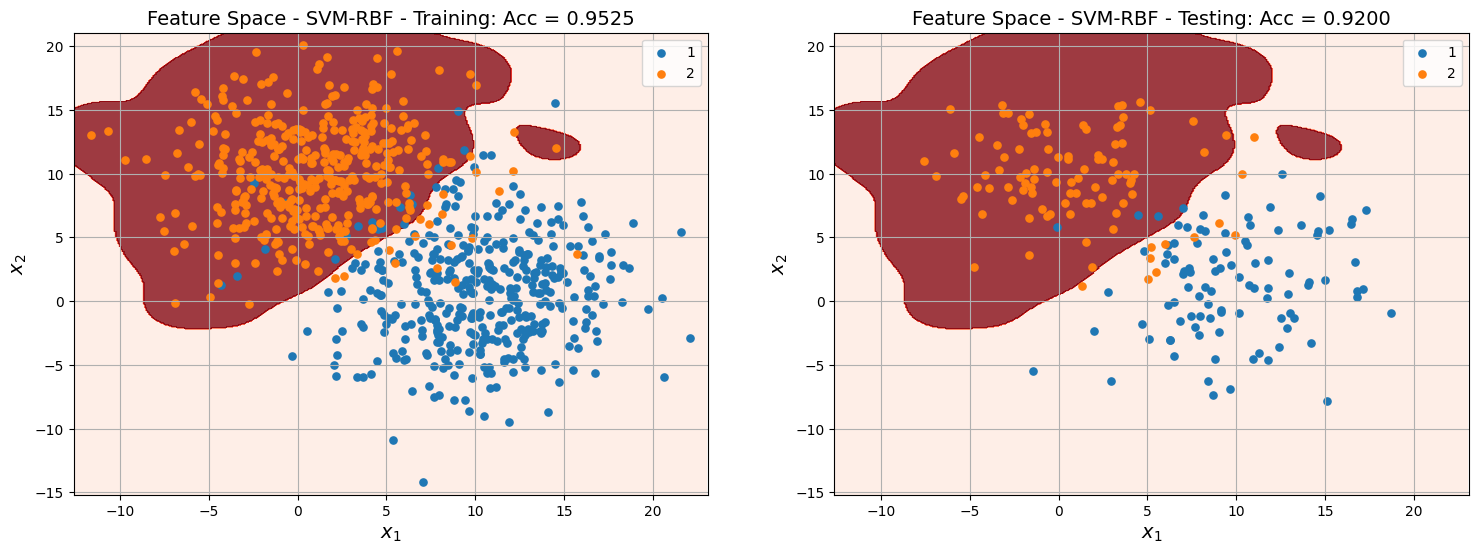

In [ ]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "rbf", gamma=0.2,C=0.1)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset
y0  = clf.predict(Xtrain)

# Evaluation on testing subset
ypred  = clf.predict(Xtest)

# Display results
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-RBF',decisionline=1)



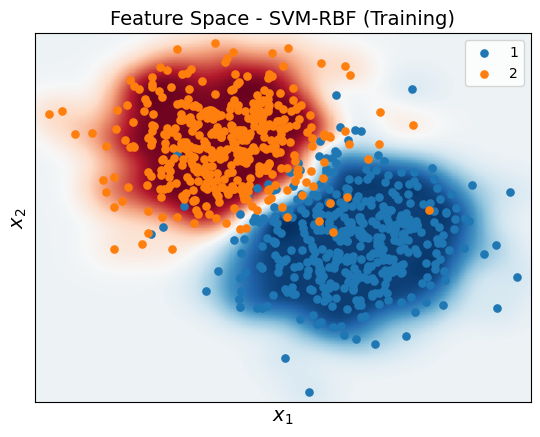

In [ ]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-RBF (Training)')

# SVM Sigmoid

Training:
Confusion Matrix:
[[350  50]
 [ 52 348]]
Accuracy = 87.25
Testing:
Confusion Matrix:
[[86 14]
 [13 87]]
Accuracy = 86.50


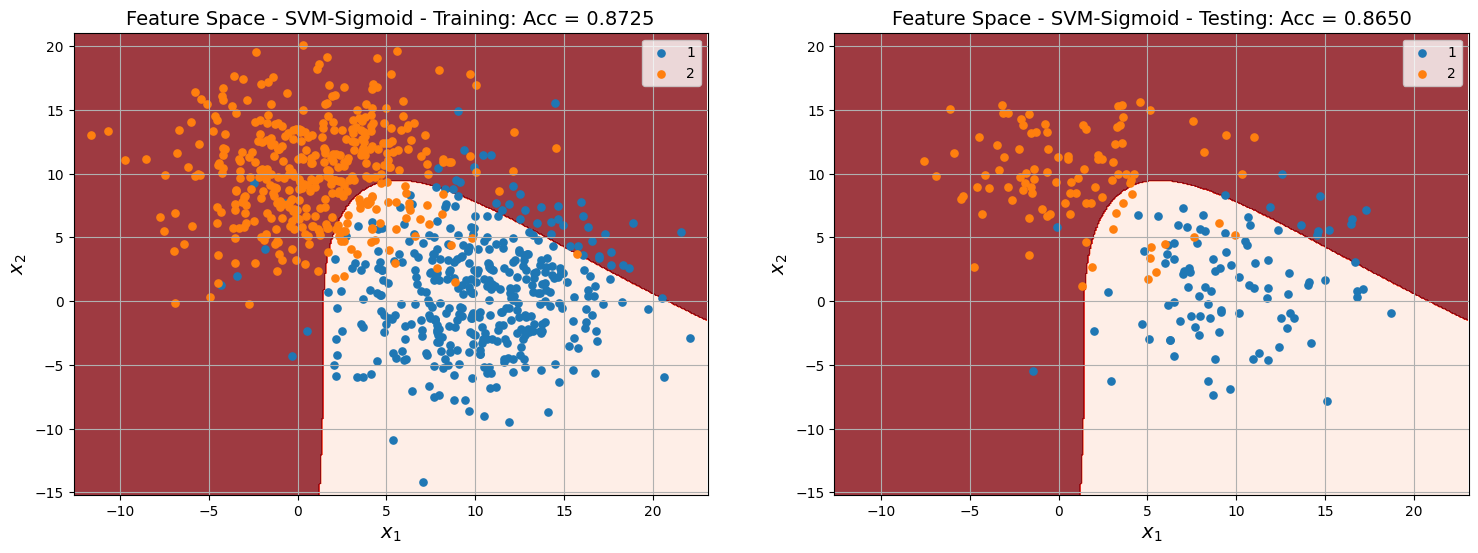

In [ ]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "sigmoid", gamma=0.01, C=1.5)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset
y0  = clf.predict(Xtrain)

# Evaluation on testing subset
ypred  = clf.predict(Xtest)

# Display results
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-Sigmoid',decisionline=1)

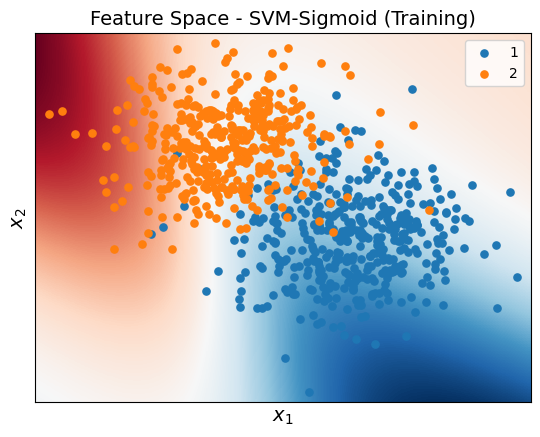

In [ ]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-Sigmoid (Training)')